In [17]:
import sys
sys.path.append('../scripts') 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
import load_data


In [5]:
conn = load_data.connect_to_db()


Connected to the database


In [6]:
query = "SELECT * FROM xdr_data;"

df = load_data.load_data(query, conn)


c:\Users\Kalea\Desktop\week-2\notebooks\../scripts\load_data.py:47: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query, conn)


Data loaded successfully
Database connection closed


In [7]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.304243e+19,4/24/2019 2:21,562.0,4/25/2019 0:01,360.0,78028.0,2.082015e+14,3.364539e+10,3.594101e+13,D73501B,...,1604789.0,17310647.0,626760.0,16359693.0,548143099.0,13483093.0,105439456.0,3817761.0,55197327.0,558604592.0
1,1.311448e+19,4/24/2019 2:21,318.0,4/25/2019 0:01,360.0,78028.0,2.082015e+14,3.364539e+10,3.594101e+13,D73501B,...,7314856.0,11503244.0,8907029.0,3900515.0,8504304.0,8663044.0,489464672.0,9567100.0,35143689.0,38168004.0
2,7.277826e+18,4/24/2019 2:21,167.0,4/25/2019 2:21,997.0,86399.0,2.082014e+14,3.376123e+10,8.637690e+13,D70764A,...,9333311.0,15131922.0,10503732.0,1793302.0,40135598.0,12965947.0,138104466.0,9628430.0,40034645.0,69604353.0
3,7.277826e+18,4/24/2019 2:21,731.0,4/25/2019 2:21,685.0,86399.0,2.082018e+14,3.366532e+10,8.637690e+13,D70789A,...,1211990.0,8661067.0,6045339.0,3417836.0,129841992.0,780008.0,516591991.0,5880137.0,19540068.0,150361215.0
4,1.304243e+19,4/24/2019 2:21,308.0,4/25/2019 2:21,256.0,86399.0,2.082018e+14,3.376110e+10,8.637690e+13,D21332A,...,11832321.0,6103975.0,9188612.0,4720982.0,532201170.0,8666429.0,26958704.0,2836999.0,25491970.0,562931692.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [9]:
df.describe()
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL 

In [33]:

# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values per column:\n", missing_percentage)


Percentage of missing values per column:
 Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)         

In [11]:
# Check if missing values occur together
tcp_cols = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']
missing_pattern = df[tcp_cols].isnull().sum(axis=1)
print("\nRows with both columns missing:", (missing_pattern == 2).sum())
print("Rows with one column missing:", (missing_pattern == 1).sum())


Rows with both columns missing: 85265
Rows with one column missing: 14265


In [12]:
# Fill missing values with the mean of the column
for col in tcp_cols:
   df[col] = df[col].fillna(df[col].mean())

In [14]:
df = df.dropna()
# Verify the changes
print("Shape after handling missing values:", df.shape)
print("\nRemaining missing values:\n", df.isnull().sum())

Shape after handling missing values: (18312, 55)

Remaining missing values:
 Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL 

In [15]:
# Count the top 10 most used handsets
top_10_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 Handsets Used by Customers:")
print(top_10_handsets)

Top 10 Handsets Used by Customers:
Huawei B528S-23A                8958
Huawei E5180                     802
Apple iPhone 7 (A1778)           555
Apple iPhone 6 (A1586)           548
Apple iPhone 6S (A1688)          542
Apple iPhone Xr (A2105)          537
undefined                        488
Apple iPhone X (A1901)           473
Apple iPhone 8 (A1905)           468
Samsung Galaxy S8 (Sm-G950F)     425
Name: Handset Type, dtype: int64


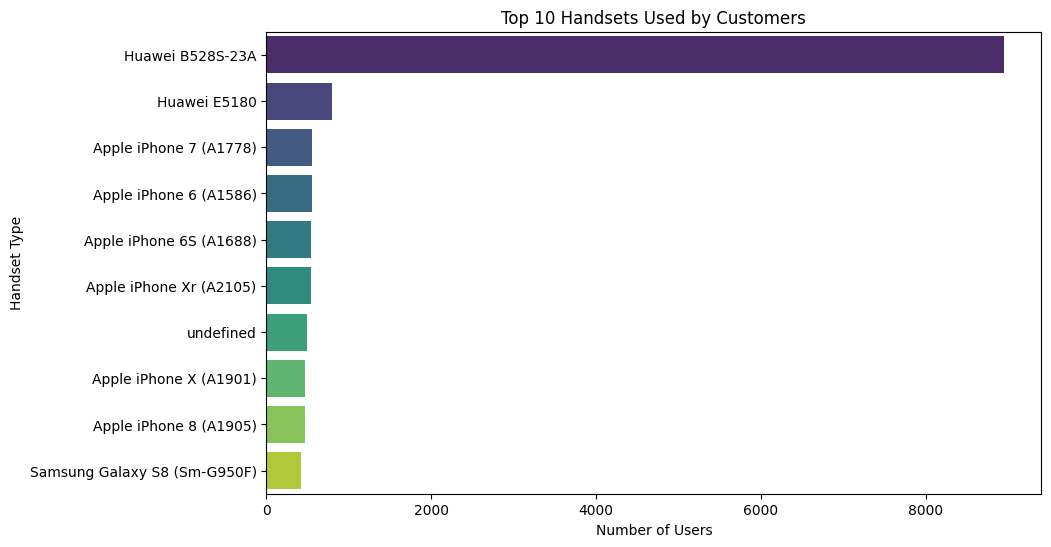

In [18]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_handsets.values, y=top_10_handsets.index, palette='viridis')
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Number of Users')
plt.ylabel('Handset Type')
plt.show()

### Top 3 Handset Manufacturer

Top 3 Handset Manufacturers:
Huawei     10622
Apple       4692
Samsung     2150
Name: Handset Manufacturer, dtype: int64


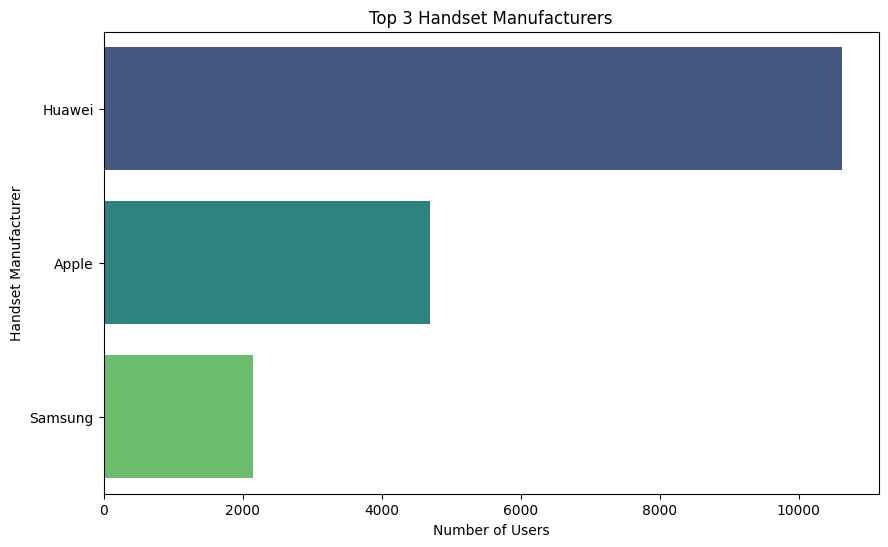

In [19]:
# Count the top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Handset Manufacturers:")
print(top_3_manufacturers)
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_3_manufacturers.values, y=top_3_manufacturers.index, palette='viridis')
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Number of Users')
plt.ylabel('Handset Manufacturer')
plt.show()

### Top 5 Handsets for each of the top 3 manufacturers


Top 5 Handsets for Manufacturer: Huawei
Huawei B528S-23A                  8958
Huawei E5180                       802
Huawei P20                         110
Huawei P20 Pro                     100
Huawei P20 Lite Huawei Nova 3E      93
Name: Handset Type, dtype: int64

Top 5 Handsets for Manufacturer: Apple
Apple iPhone 7 (A1778)     555
Apple iPhone 6 (A1586)     548
Apple iPhone 6S (A1688)    542
Apple iPhone Xr (A2105)    537
Apple iPhone X (A1901)     473
Name: Handset Type, dtype: int64

Top 5 Handsets for Manufacturer: Samsung
Samsung Galaxy S8 (Sm-G950F)         425
Samsung Galaxy S9 Sm-G960F Ds        206
Samsung Galaxy S7 (Sm-G930X)         192
Samsung Galaxy S7 Edge (Sm-G935X)    139
Samsung Galaxy A8 (2018)             123
Name: Handset Type, dtype: int64


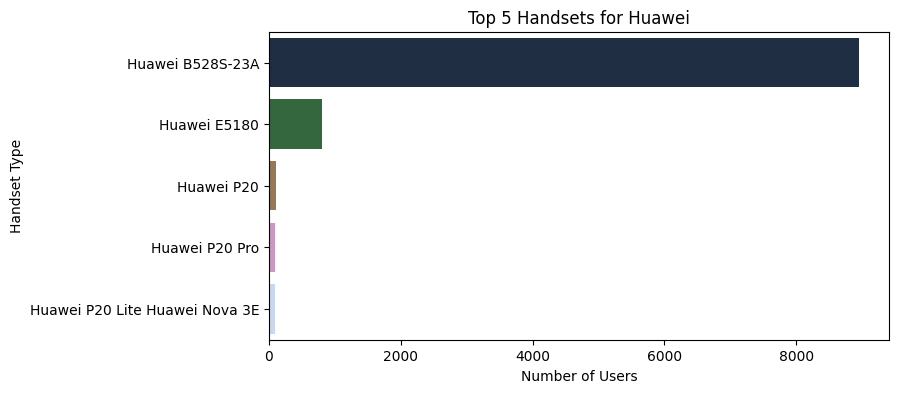

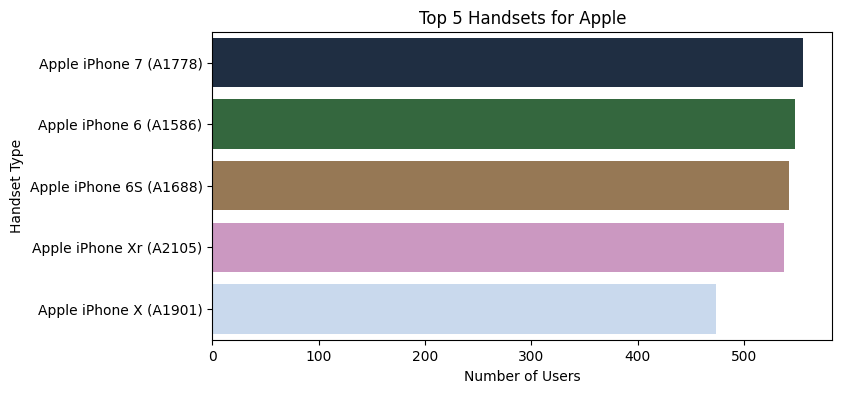

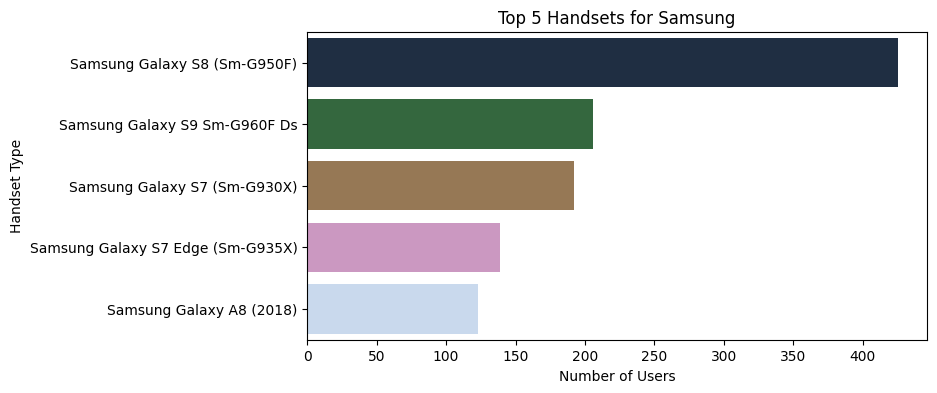

In [20]:
# Identify top 5 handsets for each of the top 3 manufacturers
top_5_handsets_per_manufacturer = {}

for manufacturer in top_3_manufacturers.index:
    manufacturer_df = df[df['Handset Manufacturer'] == manufacturer]
    top_5_handsets = manufacturer_df['Handset Type'].value_counts().head(5)
    top_5_handsets_per_manufacturer[manufacturer] = top_5_handsets

# Display the results
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"\nTop 5 Handsets for Manufacturer: {manufacturer}")
    print(handsets)

# Visualization for each manufacturer
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    plt.figure(figsize=(8, 4))
    sns.barplot(x=handsets.values, y=handsets.index, palette='cubehelix')
    plt.title(f'Top 5 Handsets for {manufacturer}')
    plt.xlabel('Number of Users')
    plt.ylabel('Handset Type')
    plt.show()

### User Stats

In [21]:
# Create a new variable name to avoid any conflicts
user_stats = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Rename columns
user_stats.rename(columns={
    'Bearer Id': 'num_xdr_sessions',
    'Dur. (ms)': 'total_session_duration',
    'Total DL (Bytes)': 'total_download_data',
    'Total UL (Bytes)': 'total_upload_data'
}, inplace=True)

# Calculate total data volume as a new column
user_stats['total_data_volume'] = user_stats['total_download_data'] + user_stats['total_upload_data']

# View the results
print(user_stats.head())

   MSISDN/Number  num_xdr_sessions  total_session_duration  \
0   3.360101e+10                 1                 18555.0   
1   3.360103e+10                 1                 55730.0   
2   3.360105e+10                 1                 59569.0   
3   3.360106e+10                 1                 10532.0   
4   3.360108e+10                 1                 26383.0   

   total_download_data  total_upload_data  total_data_volume  
0          816033480.0         55799100.0        871832580.0  
1          596129923.0         40923152.0        637053075.0  
2          387990943.0         57406821.0        445397764.0  
3          744454744.0         25261489.0        769716233.0  
4          402828368.0         56129715.0        458958083.0  


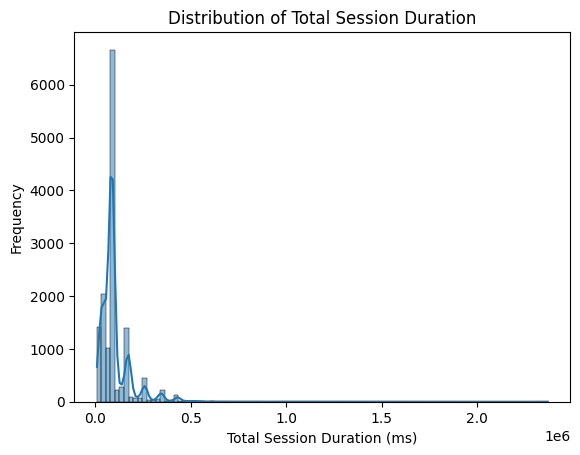

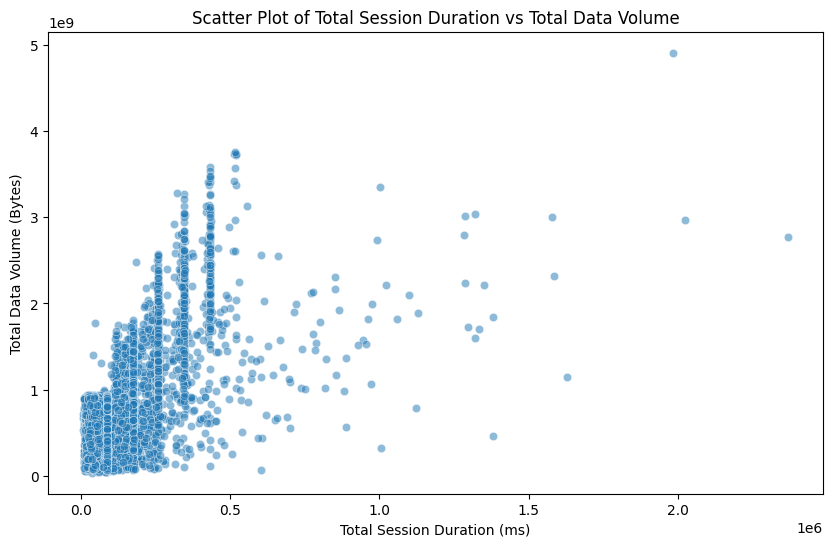

In [22]:
# Univariate analysis of total session duration
sns.histplot(user_stats['total_session_duration'], bins=100, kde=True)
plt.title('Distribution of Total Session Duration')
plt.xlabel('Total Session Duration (ms)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot for bivariate analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_session_duration', y='total_data_volume', data=user_stats, alpha=0.5)
plt.title('Scatter Plot of Total Session Duration vs Total Data Volume')
plt.xlabel('Total Session Duration (ms)')
plt.ylabel('Total Data Volume (Bytes)')
plt.show()

### Log Transform Small values and large outliers distorted the distribution.

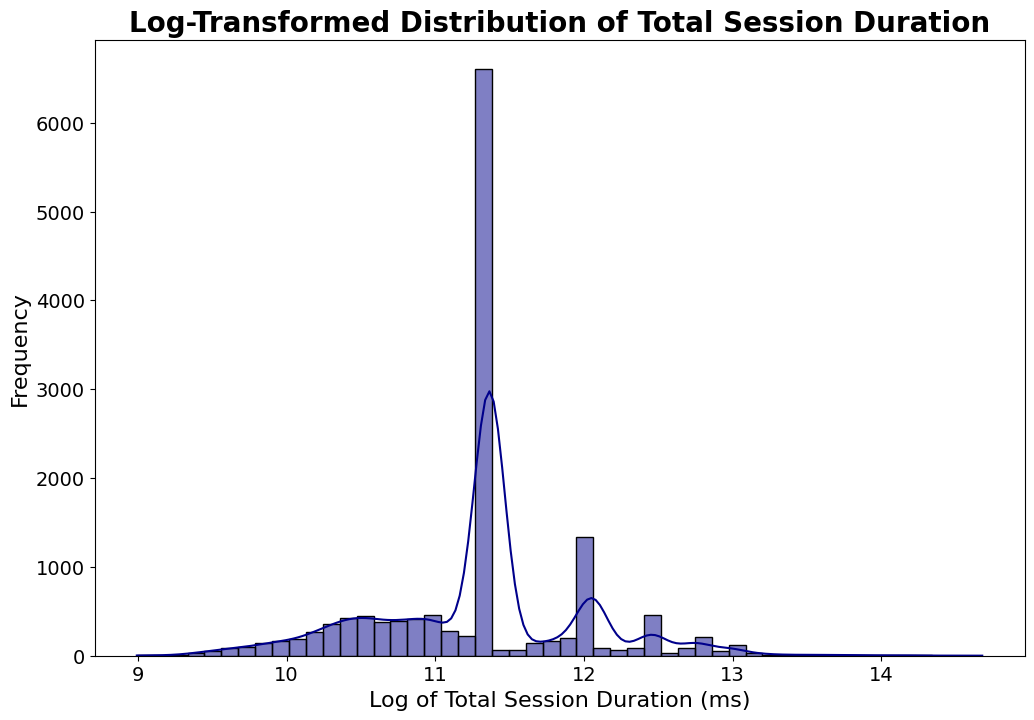

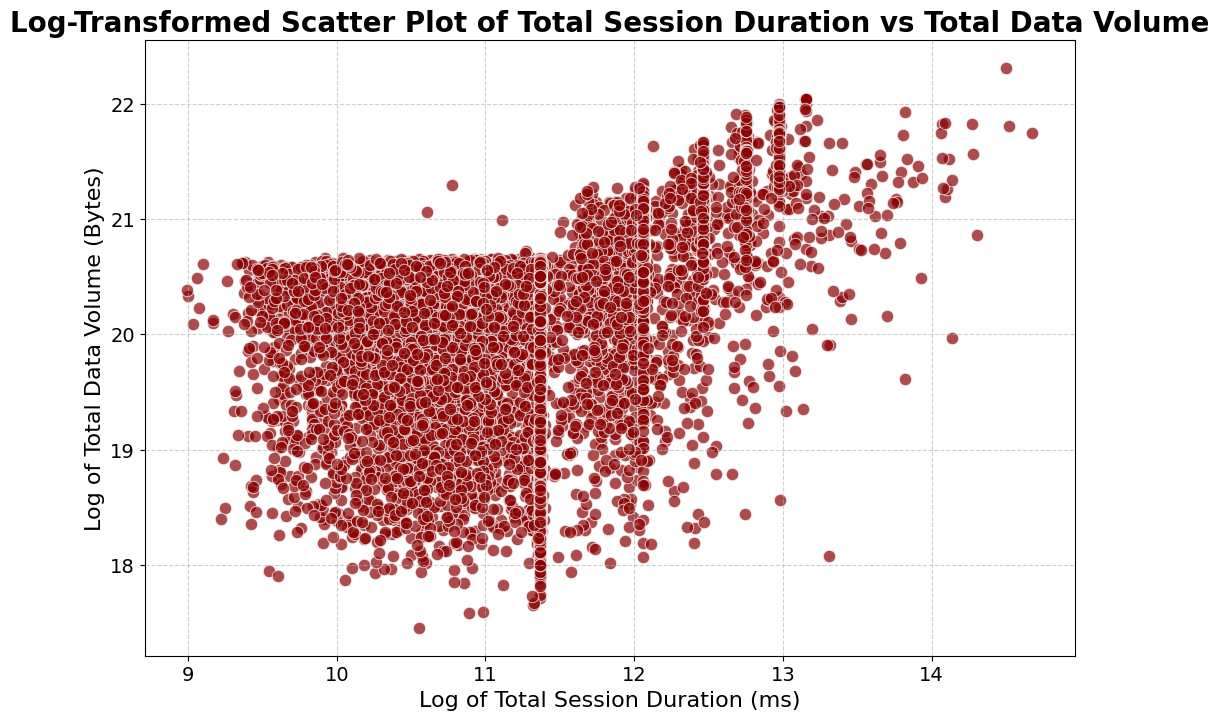

In [23]:
# Log transform the columns
user_stats['log_total_session_duration'] = np.log1p(user_stats['total_session_duration'])
user_stats['log_total_data_volume'] = np.log1p(user_stats['total_data_volume'])

# Plot the transformed values
plt.figure(figsize=(12, 8))
sns.histplot(user_stats['log_total_session_duration'], bins=50, kde=True, color='darkblue')
plt.title('Log-Transformed Distribution of Total Session Duration', fontsize=20, fontweight='bold')
plt.xlabel('Log of Total Session Duration (ms)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='log_total_session_duration', y='log_total_data_volume', data=user_stats, s=80, color='darkred', alpha=0.7)
plt.title('Log-Transformed Scatter Plot of Total Session Duration vs Total Data Volume', fontsize=20, fontweight='bold')
plt.xlabel('Log of Total Session Duration (ms)', fontsize=16)
plt.ylabel('Log of Total Data Volume (Bytes)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()